In [ ]:
x=1

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
hlca = sc.read('../../../snakemake/hlca/5fold/hlca_hyperparam/data/pp/hlca_hvg_pearson.h5ad')
hlca

AnnData object with n_obs × n_vars = 2149684 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_l

In [3]:
sc.pp.normalize_total(hlca, target_sum=1e4)

In [4]:
sc.pp.log1p(hlca)

In [5]:
macrophages_genes = {
    'SPP1': 'ENSG00000118785',
    'LIPA': 'ENSG00000107798',
    'LPL': 'ENSG00000175445',
    'FDX1': 'ENSG00000137714',
    'SPARC': 'ENSG00000113140',
    'MATK': 'ENSG00000007264',
    'GPC4': 'ENSG00000076716',
    'PALLD': 'ENSG00000129116',
    'MMP7': 'ENSG00000137673',
    'MMP9': 'ENSG00000100985',
    'CHIT1': 'ENSG00000133063',
    'CSTK': 'ENSG00000143387',
    'CHI3L1': 'ENSG00000133048',
    'CSF1': 'ENSG00000184371',
    'FCMR': 'ENSG00000162894',
    'TIMP3': 'ENSG00000100234',
    'COL22A1': 'ENSG00000169436',
    'SIGLEC15': 'ENSG00000197046',
    'CCL2': 'ENSG00000108691',
}

In [6]:
hlca.var_names

Index(['ENSG00000175899', 'ENSG00000179869', 'ENSG00000167972',
       'ENSG00000154262', 'ENSG00000141338', 'ENSG00000085563',
       'ENSG00000006071', 'ENSG00000154175', 'ENSG00000099204',
       'ENSG00000072818',
       ...
       'ENSG00000283056', 'ENSG00000004838', 'ENSG00000130844',
       'ENSG00000151789', 'ENSG00000176083', 'ENSG00000174255',
       'ENSG00000124203', 'ENSG00000187498', 'ENSG00000157554',
       'ENSG00000159167'],
      dtype='object', name='ensembl_id', length=2000)

In [2]:
adata = sc.read('../data/multigrate_mil/hlca_healthy_ipf_embed_balanced/b2e8c62cf5_adata_both.h5ad')
adata

AnnData object with n_obs × n_vars = 450214 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_leve

In [8]:
adata.obs['cell_attn'] = np.mean(adata.obs[['cell_attn_0', 'cell_attn_1', 'cell_attn_2', 'cell_attn_3', 'cell_attn_4']], axis=1)

In [9]:
ipf = adata[adata.obs['lung_condition_coarse'] == 'IPF'].copy()
ipf

AnnData object with n_obs × n_vars = 239952 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_leve

In [10]:
threshold_idx = int(len(ipf) * 0.9)
threshold_value = sorted(ipf.obs['cell_attn'])[threshold_idx]
threshold_value

0.015133967623114586

In [11]:
ipf_top = ipf[ipf.obs['cell_attn'] >= threshold_value]
ipf_top

View of AnnData object with n_obs × n_vars = 23996 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_a

In [12]:
ipf_genes = hlca[ipf.obs_names].copy()
ipf_genes

AnnData object with n_obs × n_vars = 239952 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_le

In [13]:
ipf_top_genes = hlca[ipf_top.obs_names].copy()
ipf_top_genes

AnnData object with n_obs × n_vars = 23996 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_lev

In [14]:
ipf_genes_macrophages = ipf_genes[ipf_genes.obs['transf_ann_level_3_label'] == 'Macrophages'].copy()
ipf_genes_macrophages

AnnData object with n_obs × n_vars = 104045 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_le

In [15]:
ipf_top_genes_macrophages = ipf_top_genes[ipf_top_genes.obs['transf_ann_level_3_label'] == 'Macrophages'].copy()
ipf_top_genes_macrophages

AnnData object with n_obs × n_vars = 18834 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_lev

In [16]:
sc.tl.score_genes(ipf_top_genes_macrophages, gene_list=list(macrophages_genes.values()))

In [17]:
sc.tl.score_genes(ipf_genes_macrophages, gene_list=list(macrophages_genes.values()))

In [18]:
df1 = ipf_top_genes_macrophages.obs[['score']]
df1.loc[:, 'group'] = 'top 10% cells'
df2 = ipf_genes_macrophages.obs[['score']]
df2.loc[:, 'group'] = 'all cells'
df = pd.concat([df1, df2])
df

/tmp/ipykernel_1711577/283609184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'group'] = 'top 10% cells'
/tmp/ipykernel_1711577/283609184.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'group'] = 'all cells'


,score,group
SC09_AACGTTGAGTCTCAAC_reyfman_disease,0.132057,top 10% cells
157I-b_ATAGACCCAATGTAAG_adams,-0.436622,top 10% cells
210CO_TCGGGACGTTTAAGCC_adams,0.041684,top 10% cells
SC19_TTAACTCCACTTCTGC_reyfman_disease,0.105603,top 10% cells
158I-b_TGGGCGTAGATGTGTA_adams,-0.524814,top 10% cells
...,...,...
ILD61-2_TAAGTGCAGGACATTA_haberman,1.176785,all cells
228I-b_CGGACACTCAGGCAAG_adams,-0.070169,all cells
135I-b_CTAACTTTCTCAACTT_adams,-0.089926,all cells
F00431_GTCACAACAGTCCTTC_haberman,-0.335261,all cells


In [23]:
df1['score'].mean()

-0.07087845053941706

In [24]:
df2['score'].mean()

0.06478730028352866

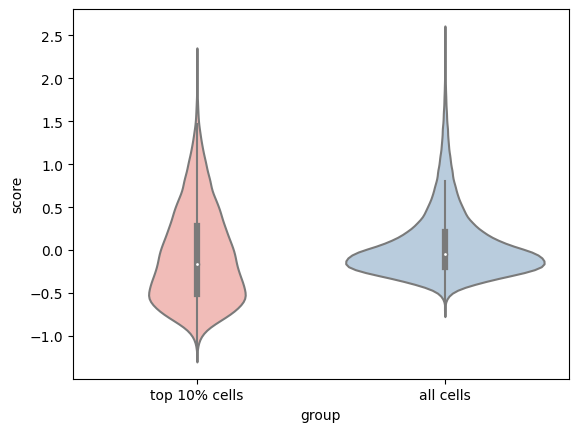

In [19]:
sns.violinplot(x="group", y="score", data=df, palette="Pastel1")
plt.show()

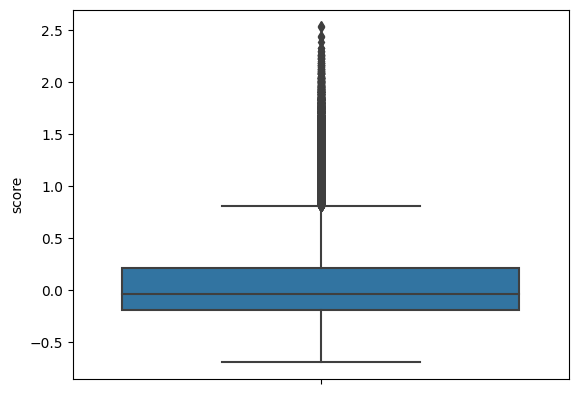

In [20]:
sns.boxplot( y=df2["score"] );
plt.show()

# other

In [20]:
adata_genes = hlca[adata.obs_names].copy()
adata_genes.obs['cell_attn'] = adata[adata_genes.obs_names].obs['cell_attn']
adata_genes

AnnData object with n_obs × n_vars = 450214 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_le

In [21]:
adata_genes_macrophages = adata_genes[adata_genes.obs['transf_ann_level_3_label'] == 'Macrophages'].copy()
adata_genes_macrophages

AnnData object with n_obs × n_vars = 138736 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_le

In [16]:
# gs = []
# for g in macrophages_genes:
#     if macrophages_genes[g] in adata_genes_macrophages.var_names:
#         gs.append(macrophages_genes[g])

In [17]:
# adata_genes_macrophages = adata_genes_macrophages[:, gs].copy()
# adata_genes_macrophages

In [22]:
sc.tl.score_genes(adata_genes_macrophages, gene_list=list(macrophages_genes.values()))

In [ ]:
adata_genes_macrophages.X = np.multiply(adata_genes_macrophages.X, np.array(adata_genes_macrophages.obs['cell_attn']).reshape(-1, 1))

In [ ]:
sc.tl.score_genes(adata_genes_macrophages, gene_list=list(macrophages_genes.values()), score_name = 'score_2')